In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
housing_df = pd.read_csv('housing_data.csv')
print(housing_df.info())
print(housing_df.head())
print(housing_df.describe())

#select key columns
key_columns = [
    'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF','Full Bath',
    'Year Built', 'Year Remod/Add', 'TotRms AbvGrd', 'Lot Area',
     'Fireplaces', 'BsmtFin SF 1', 'MS SubClass', 'Lot Frontage',
    'SalePrice'
]

housing_df_cleaned = housing_df[key_columns]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [2]:
# Check for missing values
missing_values = housing_df_cleaned.isnull().sum()

In [12]:
# Handle missing values (e.g., fill with mean or mode)
housing_df_cleaned.fillna({
    'Garage Cars': housing_df_cleaned['Garage Cars'].mode()[0],
    'Garage Area': housing_df_cleaned['Garage Area'].mean(),
    'Total Bsmt SF': housing_df_cleaned['Total Bsmt SF'].mean(),
    'BsmtFin SF 1': housing_df_cleaned['BsmtFin SF 1'].mean(),
    'Lot Frontage': housing_df_cleaned['Lot Frontage'].mean()
}, inplace=True)

missing_values = housing_df_cleaned.isnull().sum()
missing_values

/var/folders/m3/r7hwf1fs777chjp132q4bwlh0000gp/T/ipykernel_5042/3511178861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_cleaned.fillna({


Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Full Bath         0
Year Built        0
Year Remod/Add    0
TotRms AbvGrd     0
Lot Area          0
Fireplaces        0
BsmtFin SF 1      0
MS SubClass       0
Lot Frontage      0
SalePrice         0
dtype: int64

In [13]:
print(housing_df_cleaned.isnull().sum())

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Full Bath         0
Year Built        0
Year Remod/Add    0
TotRms AbvGrd     0
Lot Area          0
Fireplaces        0
BsmtFin SF 1      0
MS SubClass       0
Lot Frontage      0
SalePrice         0
dtype: int64


In [14]:
len(housing_df_cleaned)

2930

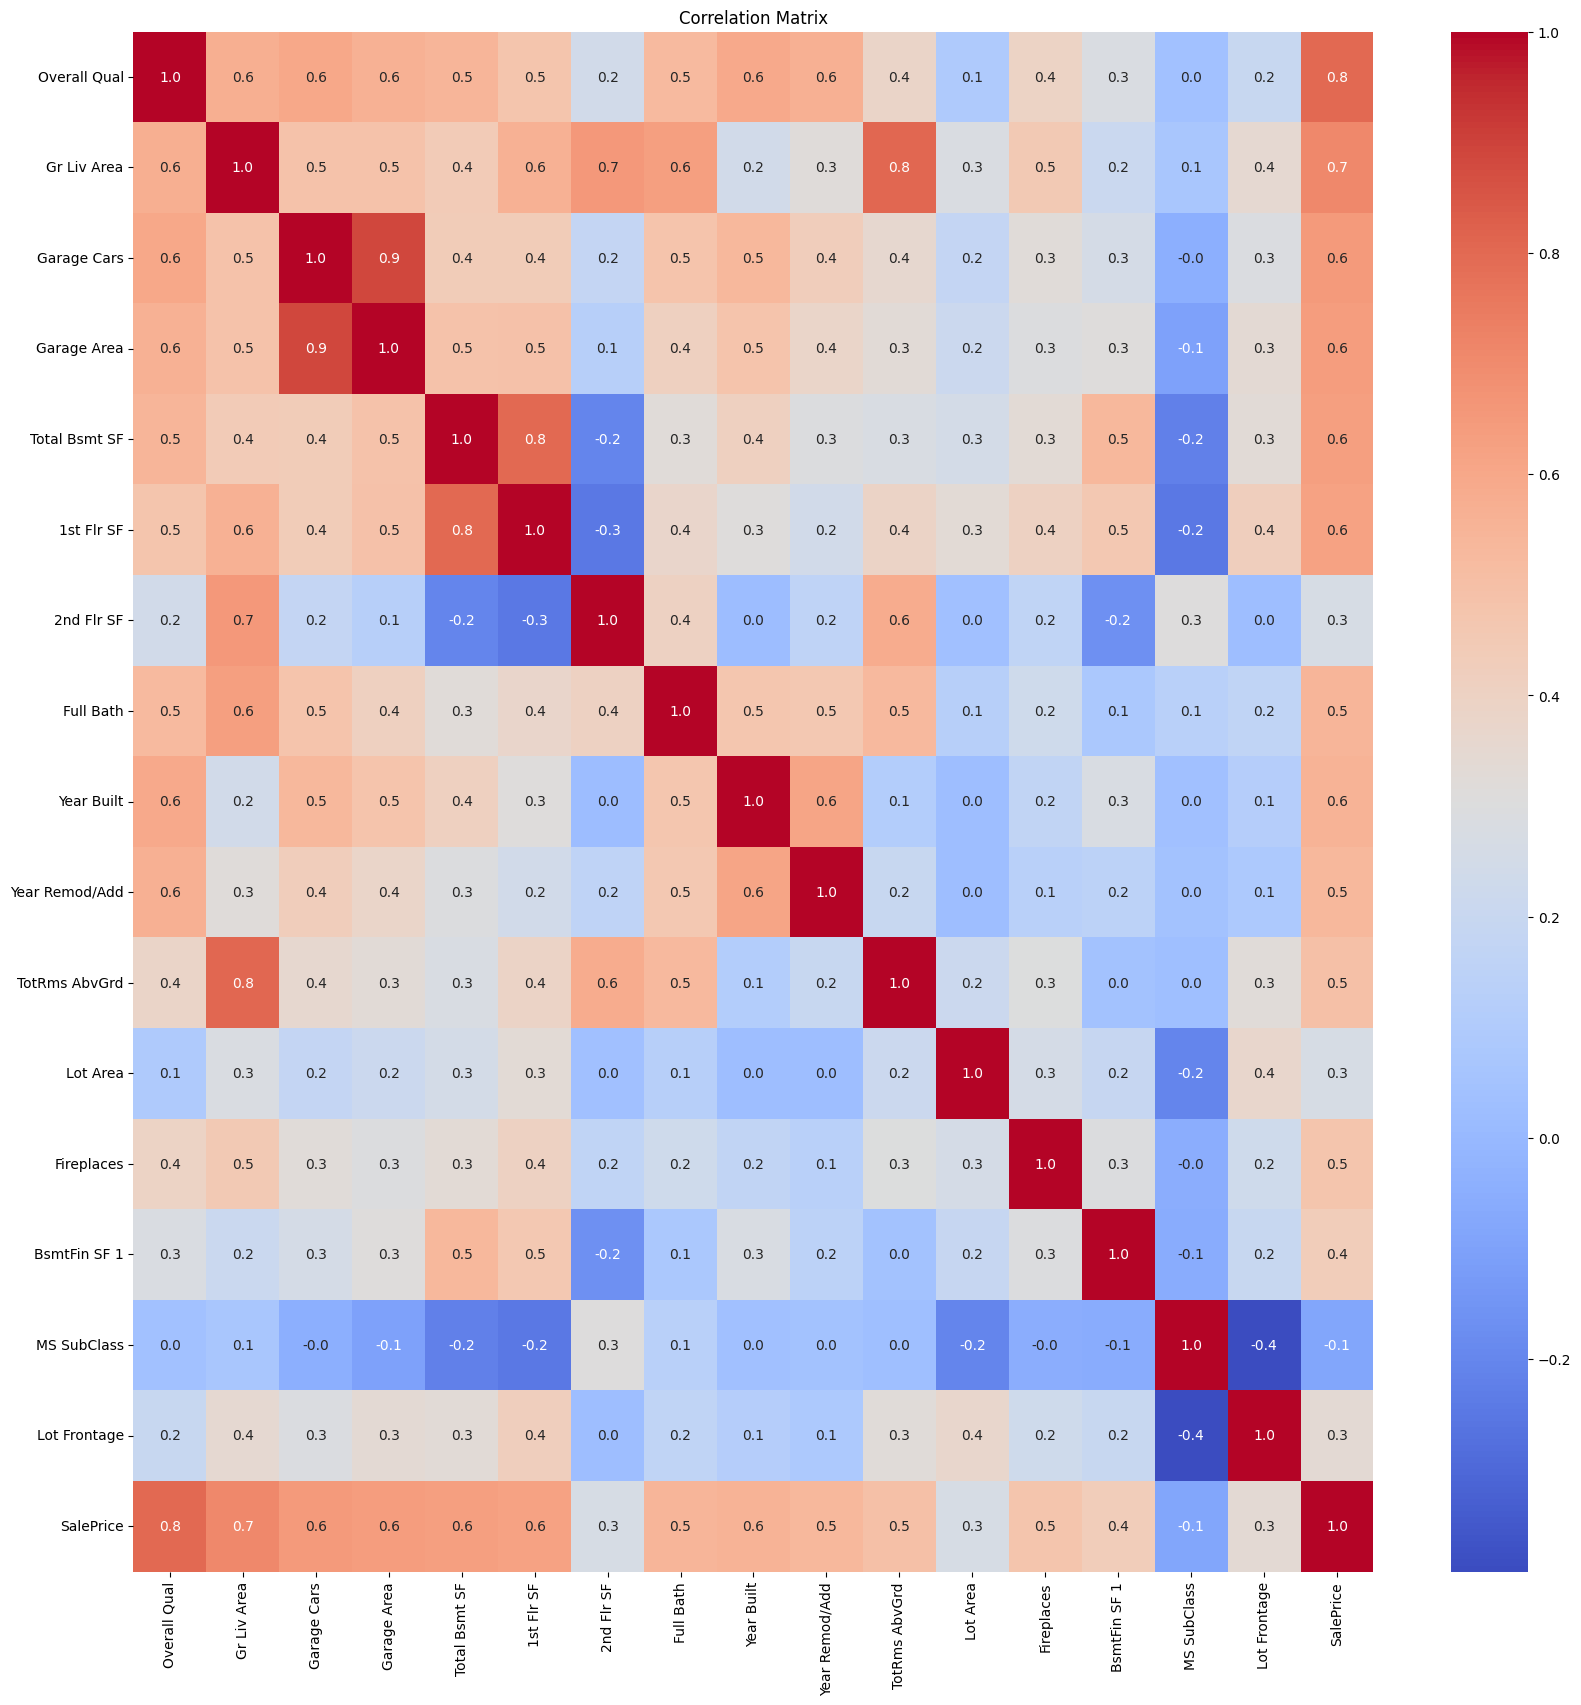

In [15]:
# correlation matrix
plt.figure(figsize=(20,20))
correlation_matrix = housing_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= '.1f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x600 with 0 Axes>

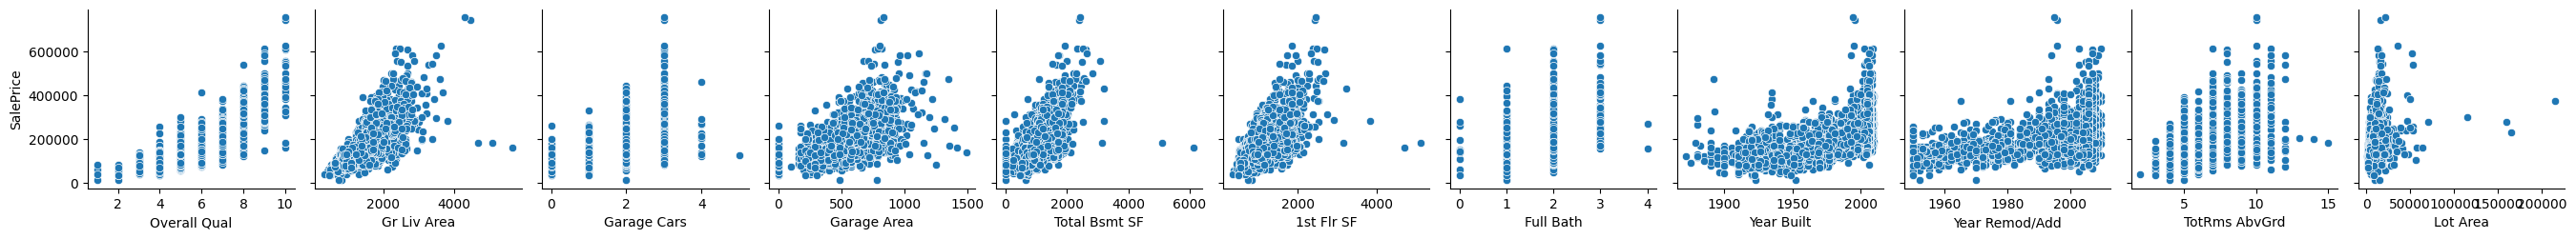

In [16]:
plt.figure(figsize=(12, 6))
sns.pairplot(housing_df_cleaned,y_vars='SalePrice', x_vars=['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'TotRms AbvGrd', 'Lot Area'])
plt.show()

In [17]:
housing_data_info = housing_df_cleaned.info()
housing_data_head = housing_df_cleaned.head()
housing_data_description = housing_df_cleaned.describe()

housing_data_info,housing_data_head,housing_data_description, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall Qual    2930 non-null   int64  
 1   Gr Liv Area     2930 non-null   int64  
 2   Garage Cars     2930 non-null   float64
 3   Garage Area     2930 non-null   float64
 4   Total Bsmt SF   2930 non-null   float64
 5   1st Flr SF      2930 non-null   int64  
 6   2nd Flr SF      2930 non-null   int64  
 7   Full Bath       2930 non-null   int64  
 8   Year Built      2930 non-null   int64  
 9   Year Remod/Add  2930 non-null   int64  
 10  TotRms AbvGrd   2930 non-null   int64  
 11  Lot Area        2930 non-null   int64  
 12  Fireplaces      2930 non-null   int64  
 13  BsmtFin SF 1    2930 non-null   float64
 14  MS SubClass     2930 non-null   int64  
 15  Lot Frontage    2930 non-null   float64
 16  SalePrice       2930 non-null   int64  
dtypes: float64(5), int64(12)
memory u

(None,
    Overall Qual  Gr Liv Area  Garage Cars  Garage Area  Total Bsmt SF  \
 0             6         1656          2.0        528.0         1080.0   
 1             5          896          1.0        730.0          882.0   
 2             6         1329          1.0        312.0         1329.0   
 3             7         2110          2.0        522.0         2110.0   
 4             5         1629          2.0        482.0          928.0   
 
    1st Flr SF  2nd Flr SF  Full Bath  Year Built  Year Remod/Add  \
 0        1656           0          1        1960            1960   
 1         896           0          1        1961            1961   
 2        1329           0          1        1958            1958   
 3        2110           0          2        1968            1968   
 4         928         701          2        1997            1998   
 
    TotRms AbvGrd  Lot Area  Fireplaces  BsmtFin SF 1  MS SubClass  \
 0              7     31770           2         639.0        

In [18]:
housing_df_cleaned.to_csv('housing_data_cleaned.csv', index=False)

In [19]:
missing_values

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Full Bath         0
Year Built        0
Year Remod/Add    0
TotRms AbvGrd     0
Lot Area          0
Fireplaces        0
BsmtFin SF 1      0
MS SubClass       0
Lot Frontage      0
SalePrice         0
dtype: int64

In [20]:
housing_df_cleaned.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,2nd Flr SF,Full Bath,Year Built,Year Remod/Add,TotRms AbvGrd,Lot Area,Fireplaces,BsmtFin SF 1,MS SubClass,Lot Frontage,SalePrice
0,6,1656,2.0,528.0,1080.0,1656,0,1,1960,1960,7,31770,2,639.0,20,141.0,215000
1,5,896,1.0,730.0,882.0,896,0,1,1961,1961,5,11622,0,468.0,20,80.0,105000
2,6,1329,1.0,312.0,1329.0,1329,0,1,1958,1958,6,14267,0,923.0,20,81.0,172000
3,7,2110,2.0,522.0,2110.0,2110,0,2,1968,1968,8,11160,2,1065.0,20,93.0,244000
4,5,1629,2.0,482.0,928.0,928,701,2,1997,1998,6,13830,1,791.0,60,74.0,189900
